### Electrical Faults Detection and Classsification

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_class = pd.read_csv('classData.csv')

In [3]:
df_class

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


# EDA

In [4]:
df_class.sample(10)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
1880,1,0,1,1,-192.935825,846.884964,51.837803,0.032227,-0.164014,0.131787
6974,0,0,0,0,-47.904448,95.493717,-50.711667,-0.556255,0.058209,0.498046
1420,1,0,1,1,574.338908,276.076389,51.118350,0.041211,-0.370636,0.329425
1798,1,0,1,1,762.074638,-26.134986,38.976714,0.035374,-0.371235,0.335860
6857,0,0,0,0,49.851717,25.810981,-78.820402,-0.129222,0.592603,-0.463381
2833,0,1,1,0,-31.513524,-459.468857,493.334625,-0.483642,-0.032022,0.515663
1589,1,0,1,1,-813.933469,151.138288,-32.577557,-0.031749,0.358672,-0.326923
390,1,0,0,1,-653.235349,-70.787325,32.016851,0.296482,-0.223775,-0.072706
5667,0,0,0,0,44.991726,39.635148,-87.468444,-0.222409,0.618743,-0.396334
7258,0,0,0,0,49.766407,25.548732,-78.353468,-0.138045,0.594886,-0.456841


In [5]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [6]:
df_class.isnull().sum()

G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64

In [7]:
df_class.shape

(7861, 10)

In [11]:
df_class.describe()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,0.432006,0.411271,0.555527,0.571429,13.721194,-44.845268,34.392394,-0.007667,0.001152,0.006515
std,0.495387,0.492095,0.496939,0.494903,464.741671,439.269195,371.107412,0.289150,0.313437,0.307897
min,0.000000,0.000000,0.000000,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.608016,-0.612709
25%,0.000000,0.000000,0.000000,0.000000,-119.802518,-271.845947,-61.034219,-0.130287,-0.159507,-0.215977
50%,0.000000,0.000000,1.000000,1.000000,2.042805,5.513317,-4.326711,-0.005290,0.001620,0.009281
75%,1.000000,1.000000,1.000000,1.000000,227.246377,91.194282,49.115141,0.111627,0.153507,0.239973
max,1.000000,1.000000,1.000000,1.000000,885.738571,889.868884,901.274261,0.595342,0.627875,0.600179


In [13]:
df_class.duplicated().sum()

0

In [10]:
df_class.columns

Index(['G', 'C', 'B', 'A', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'], dtype='object')

In [33]:
# list of numerical variables
numerical_features = [feature for feature in df_class.columns if df_class[feature].dtypes != 'O']
print('Number of numerical variables :', len(numerical_features))
df_class[numerical_features].head()

Number of numerical variables : 10


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


Numerical variables are usually of 2 type

1. Continous variable
2. Discrete Variables

In [32]:
# finding discrete variable 
discrete_feature = [feature for feature in numerical_features if len(df_class[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
df_class[discrete_feature].head()

Discrete Variables Count: 4


,G,C,B,A
0,1,0,0,1
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,1,0,0,1


In [31]:
# finding Continous variable 
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("continuous feature count {}".format(len(continuous_feature)))     
df_class[continuous_feature].head()

continuous feature count 6


,Ia,Ib,Ic,Va,Vb,Vc
0,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [35]:
# Finding Categorical
categorical_features=[feature for feature in df_class.columns if df_class[feature].dtypes=='O']
categorical_features

[]

### Univariate Analysis

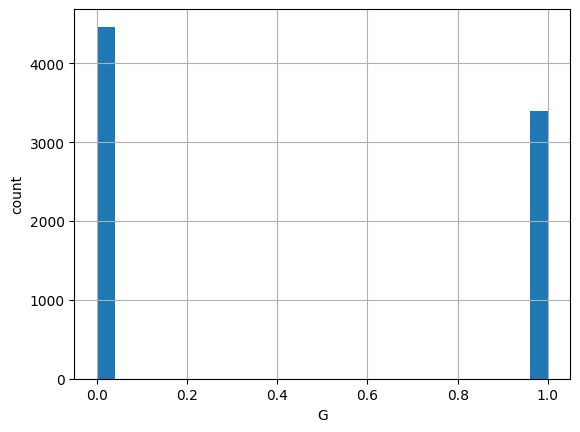

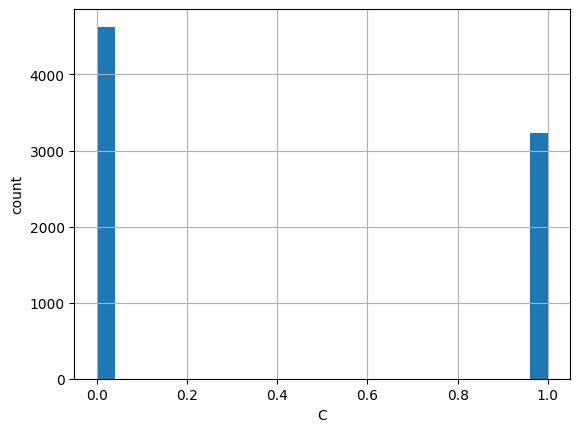

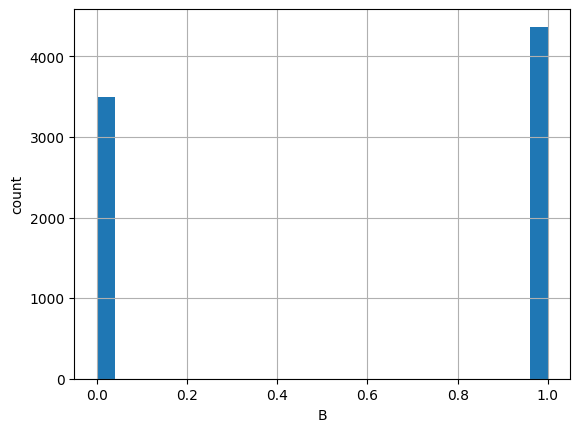

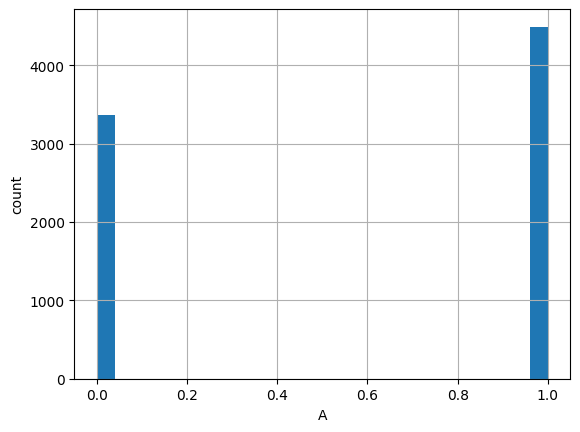

In [41]:
for feature in discrete_feature:
    data=df_class.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

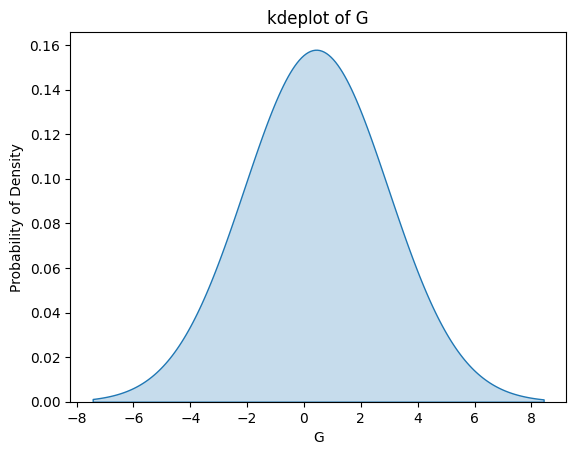

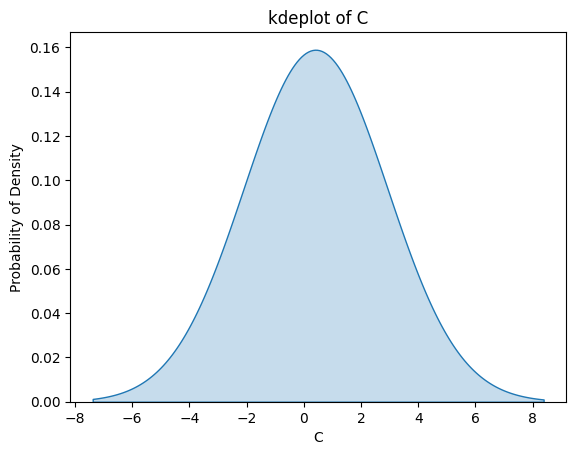

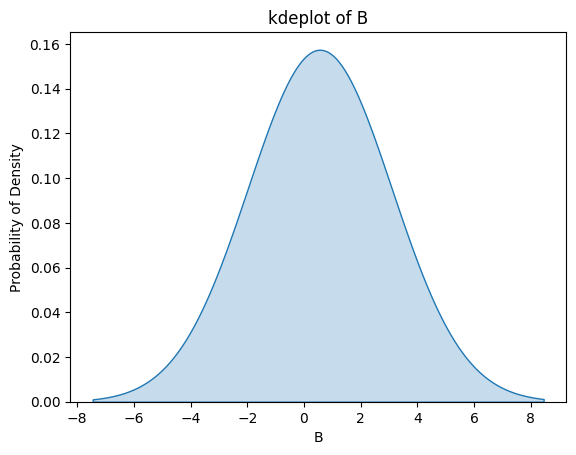

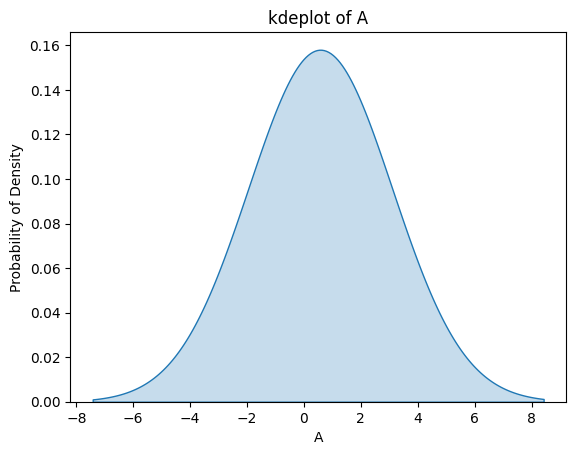

In [43]:
for feature in discrete_feature:
    plt.figure()  # Create a new figure for each boxplot
    sns.kdeplot(data[feature], fill=True, bw_method=5)
    plt.title('kdeplot of {}'.format(feature))
    plt.xlabel(feature)
    plt.ylabel('Probability of Density')
    
# Display the kdeplot
plt.show()

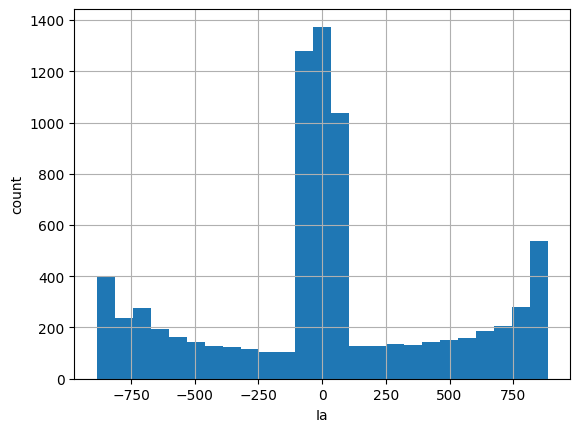

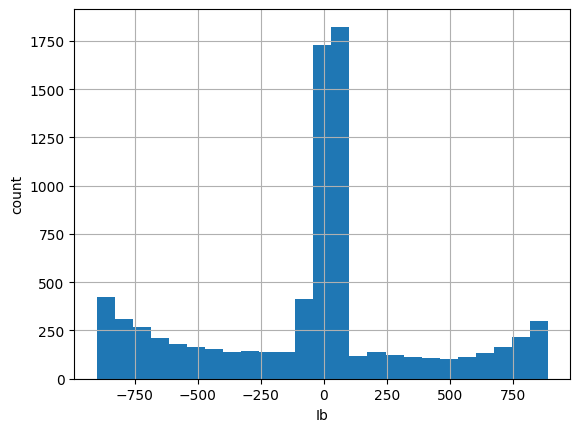

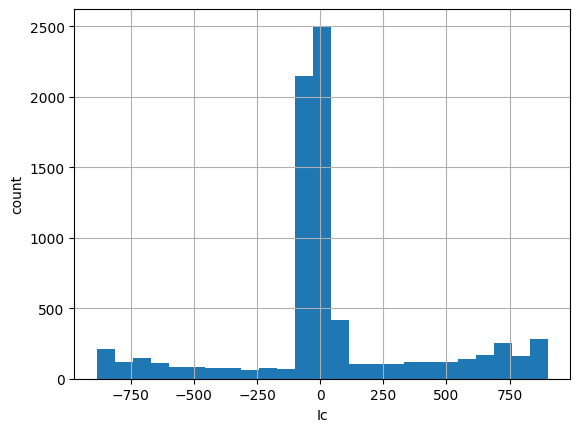

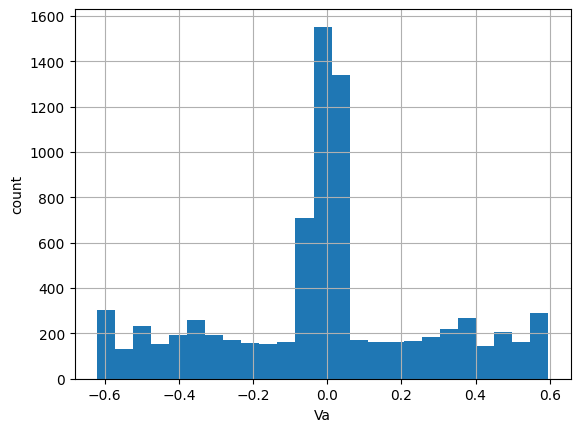

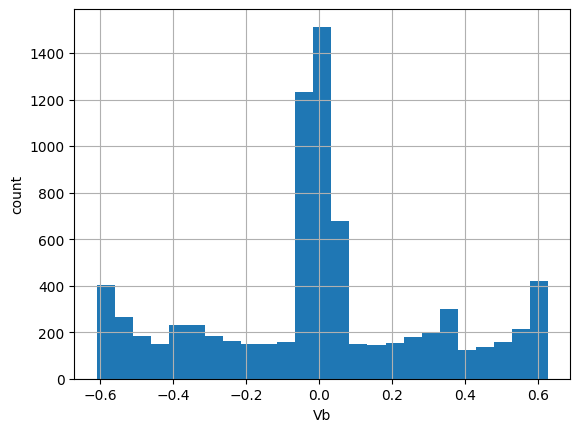

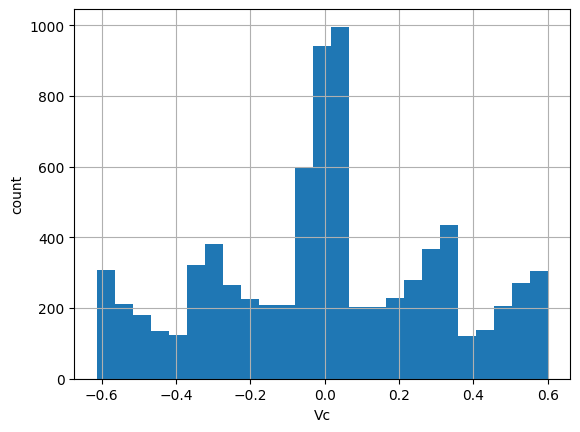

In [40]:
for feature in continuous_feature:
    data=df_class.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

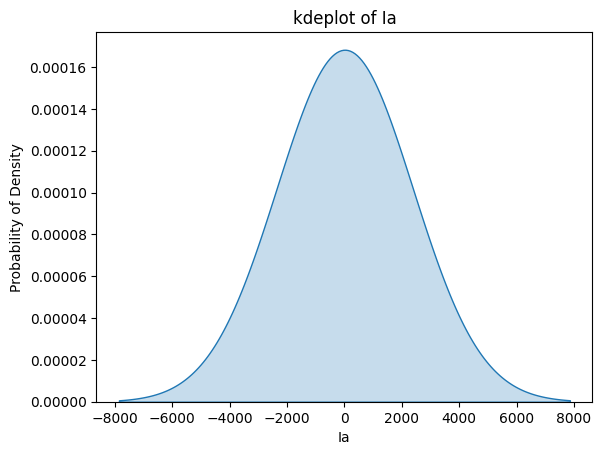

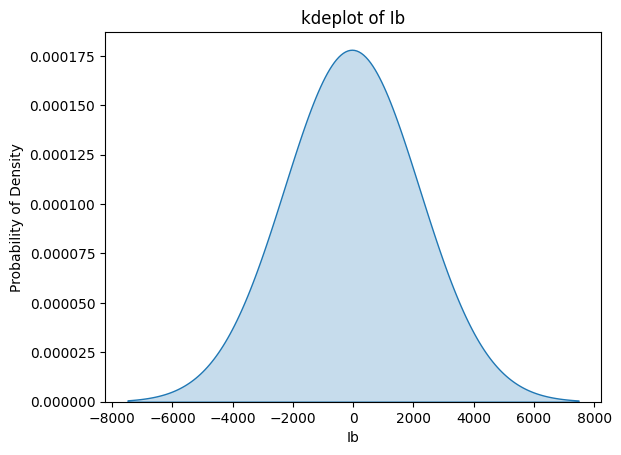

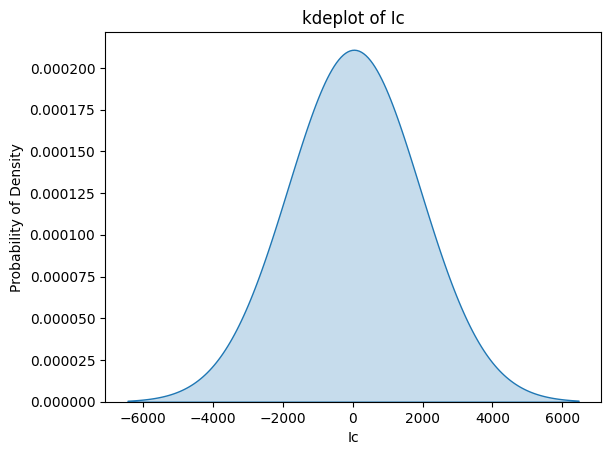

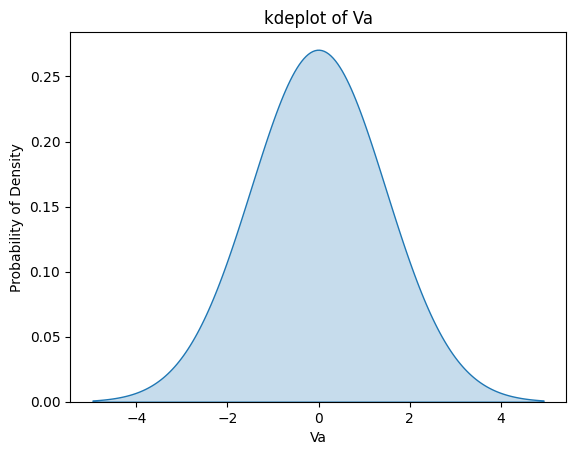

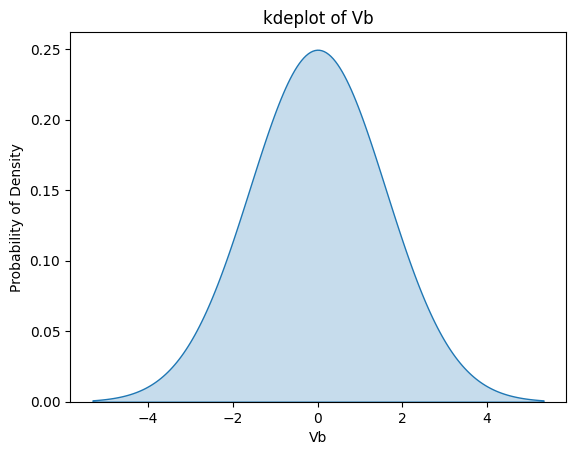

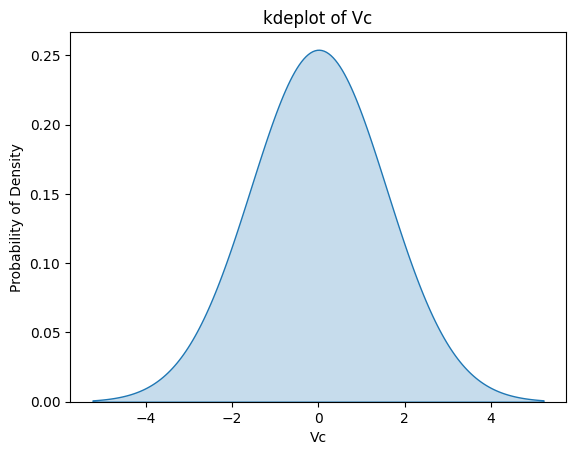

In [44]:
for feature in continuous_feature:
    plt.figure()  # Create a new figure for each boxplot
    sns.kdeplot(data[feature], fill=True, bw_method=5)
    plt.title('kdeplot of {}'.format(feature))
    plt.xlabel(feature)
    plt.ylabel('Probability of Density')
    
# Display the kdeplot
plt.show()

In [45]:
# Log Transformation

# for feature in continuous_feature:
#     data=df_class.copy()
#     if 0  in data[feature].unique(): # To avoid log(0) condition. Because log(0) is not defined
#         pass
#     else:
#         data[feature] = np.log(data[feature])
#         data['median_house_value'] = np.log(data['median_house_value'])
#         plt.scatter(data[feature], data['median_house_value'])
#         plt.xlabel(feature)
#         plt.ylabel('median_house_value')
#         plt.show()

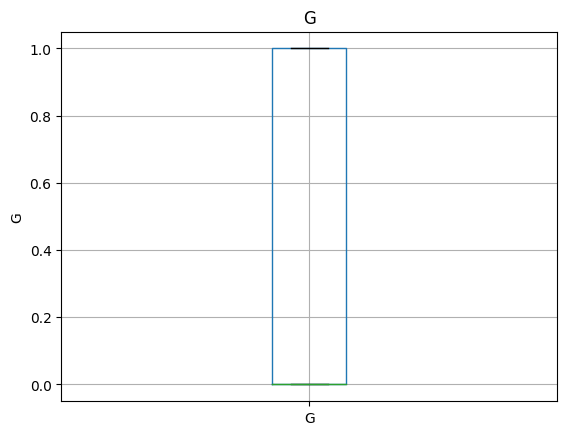

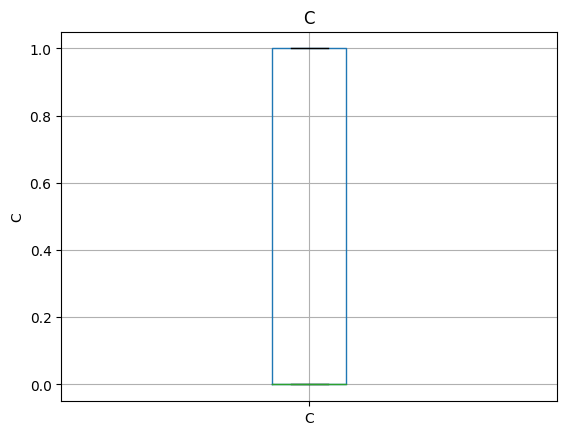

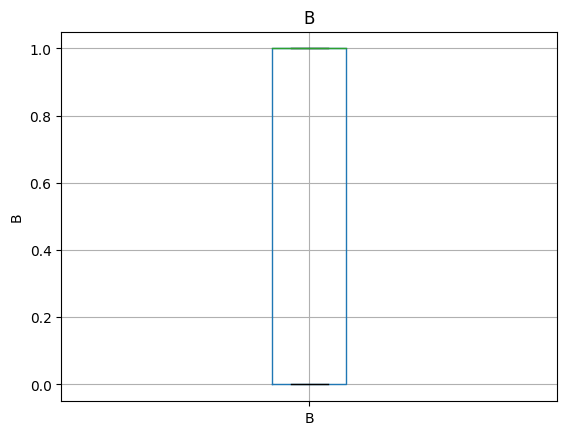

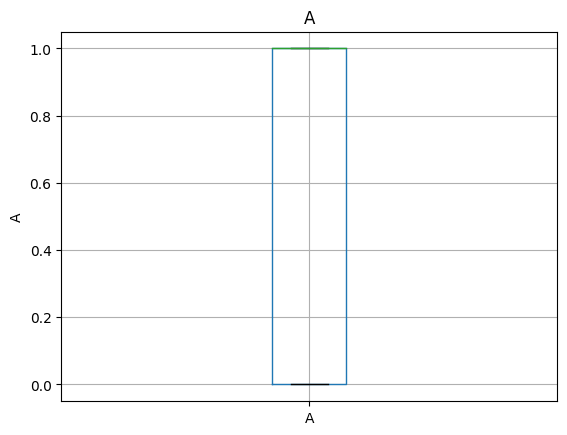

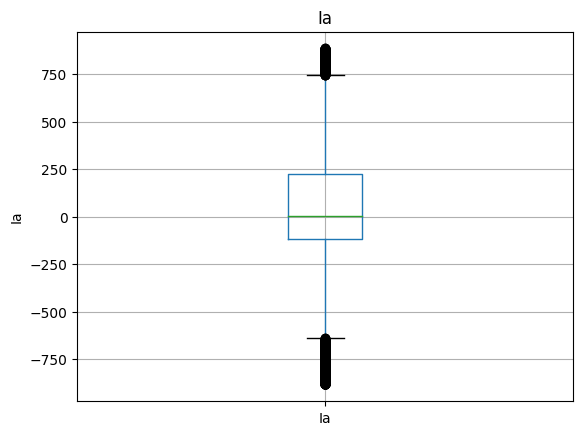

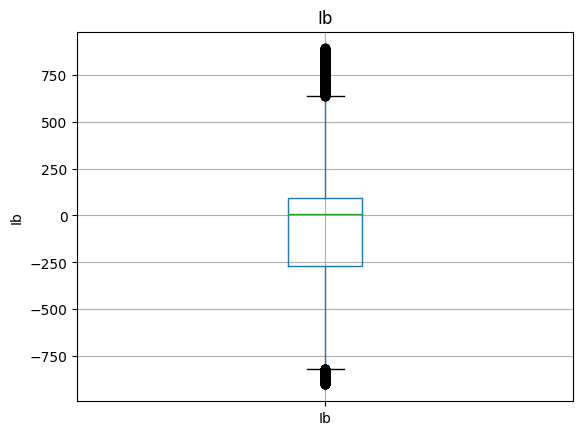

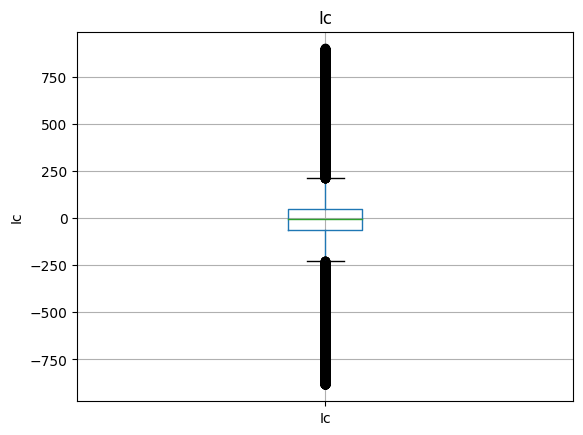

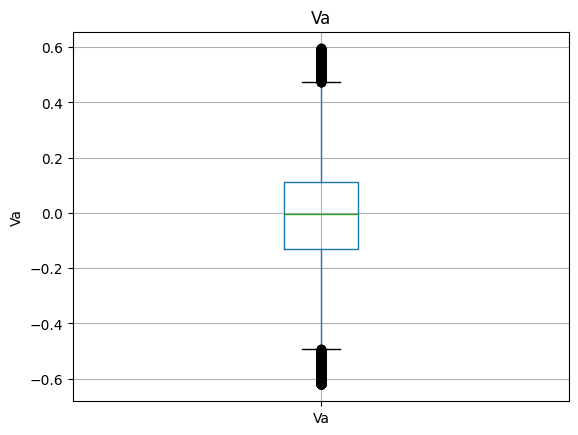

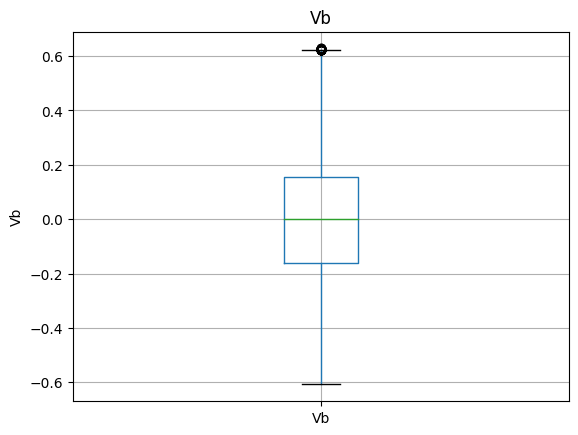

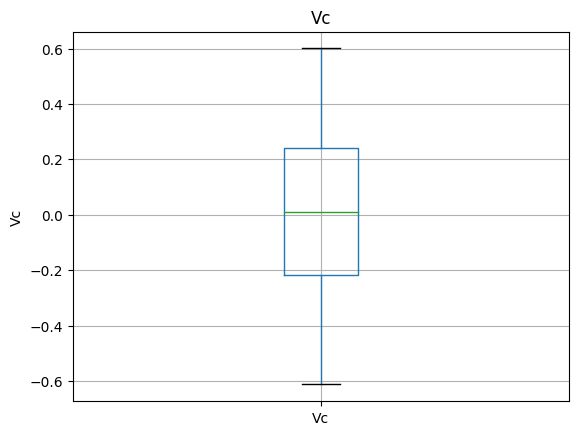

In [47]:
# Outliers Checking

for feature in df_class.columns:
    data=df_class.copy()
    data.boxplot(column=feature) # boxplot only with continuous variables not for catagorical
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

### Multivariate Analysis

In [50]:
df_class.corr()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
G,1.000000,-0.137611,0.196609,0.755273,0.041310,-0.031068,-0.003156,0.023808,-0.024048,0.002122
C,-0.137611,1.000000,0.747612,0.199335,0.000232,-0.109211,0.164323,0.018188,-0.068840,0.052998
B,0.196609,0.747612,1.000000,0.448807,0.014102,-0.139981,0.133321,0.037128,-0.075973,0.042473
A,0.755273,0.199335,0.448807,1.000000,0.036341,-0.074905,0.054071,0.029940,-0.053036,0.025873
Ia,0.041310,0.000232,0.014102,0.036341,1.000000,-0.374241,-0.276457,0.035682,-0.274612,0.246043
Ib,-0.031068,-0.109211,-0.139981,-0.074905,-0.374241,1.000000,-0.528291,0.029118,0.032101,-0.060023
Ic,-0.003156,0.164323,0.133321,0.054071,-0.276457,-0.528291,1.000000,-0.069137,-0.056967,0.122919
Va,0.023808,0.018188,0.037128,0.029940,0.035682,0.029118,-0.069137,1.000000,-0.480247,-0.450225
Vb,-0.024048,-0.068840,-0.075973,-0.053036,-0.274612,0.032101,-0.056967,-0.480247,1.000000,-0.566986
Vc,0.002122,0.052998,0.042473,0.025873,0.246043,-0.060023,0.122919,-0.450225,-0.566986,1.000000


<Axes: >

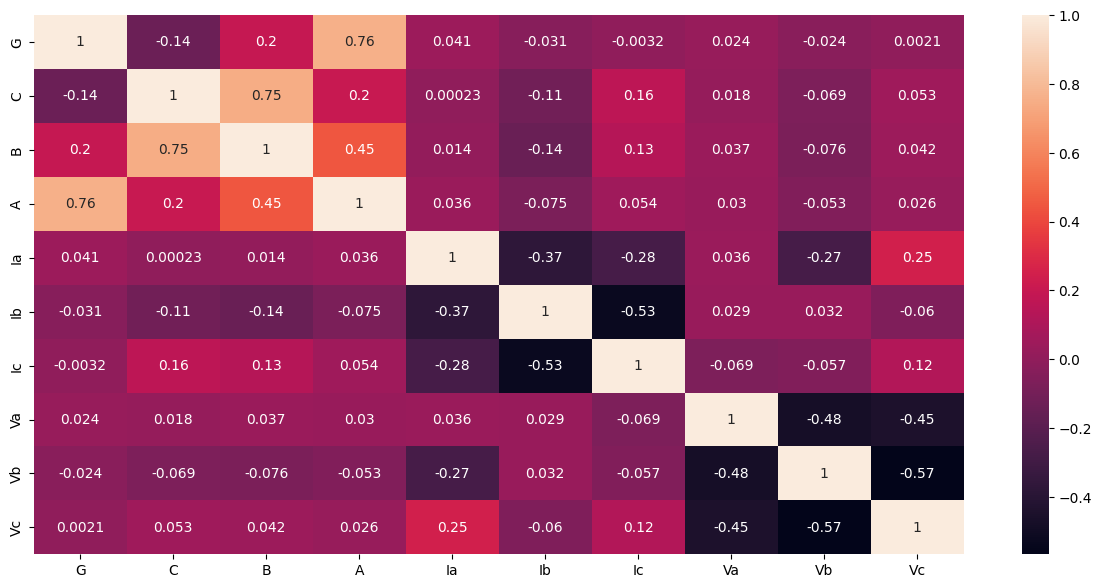

In [48]:
plt.figure(figsize=(15,7))
sns.heatmap(df_class.corr(),annot=True)

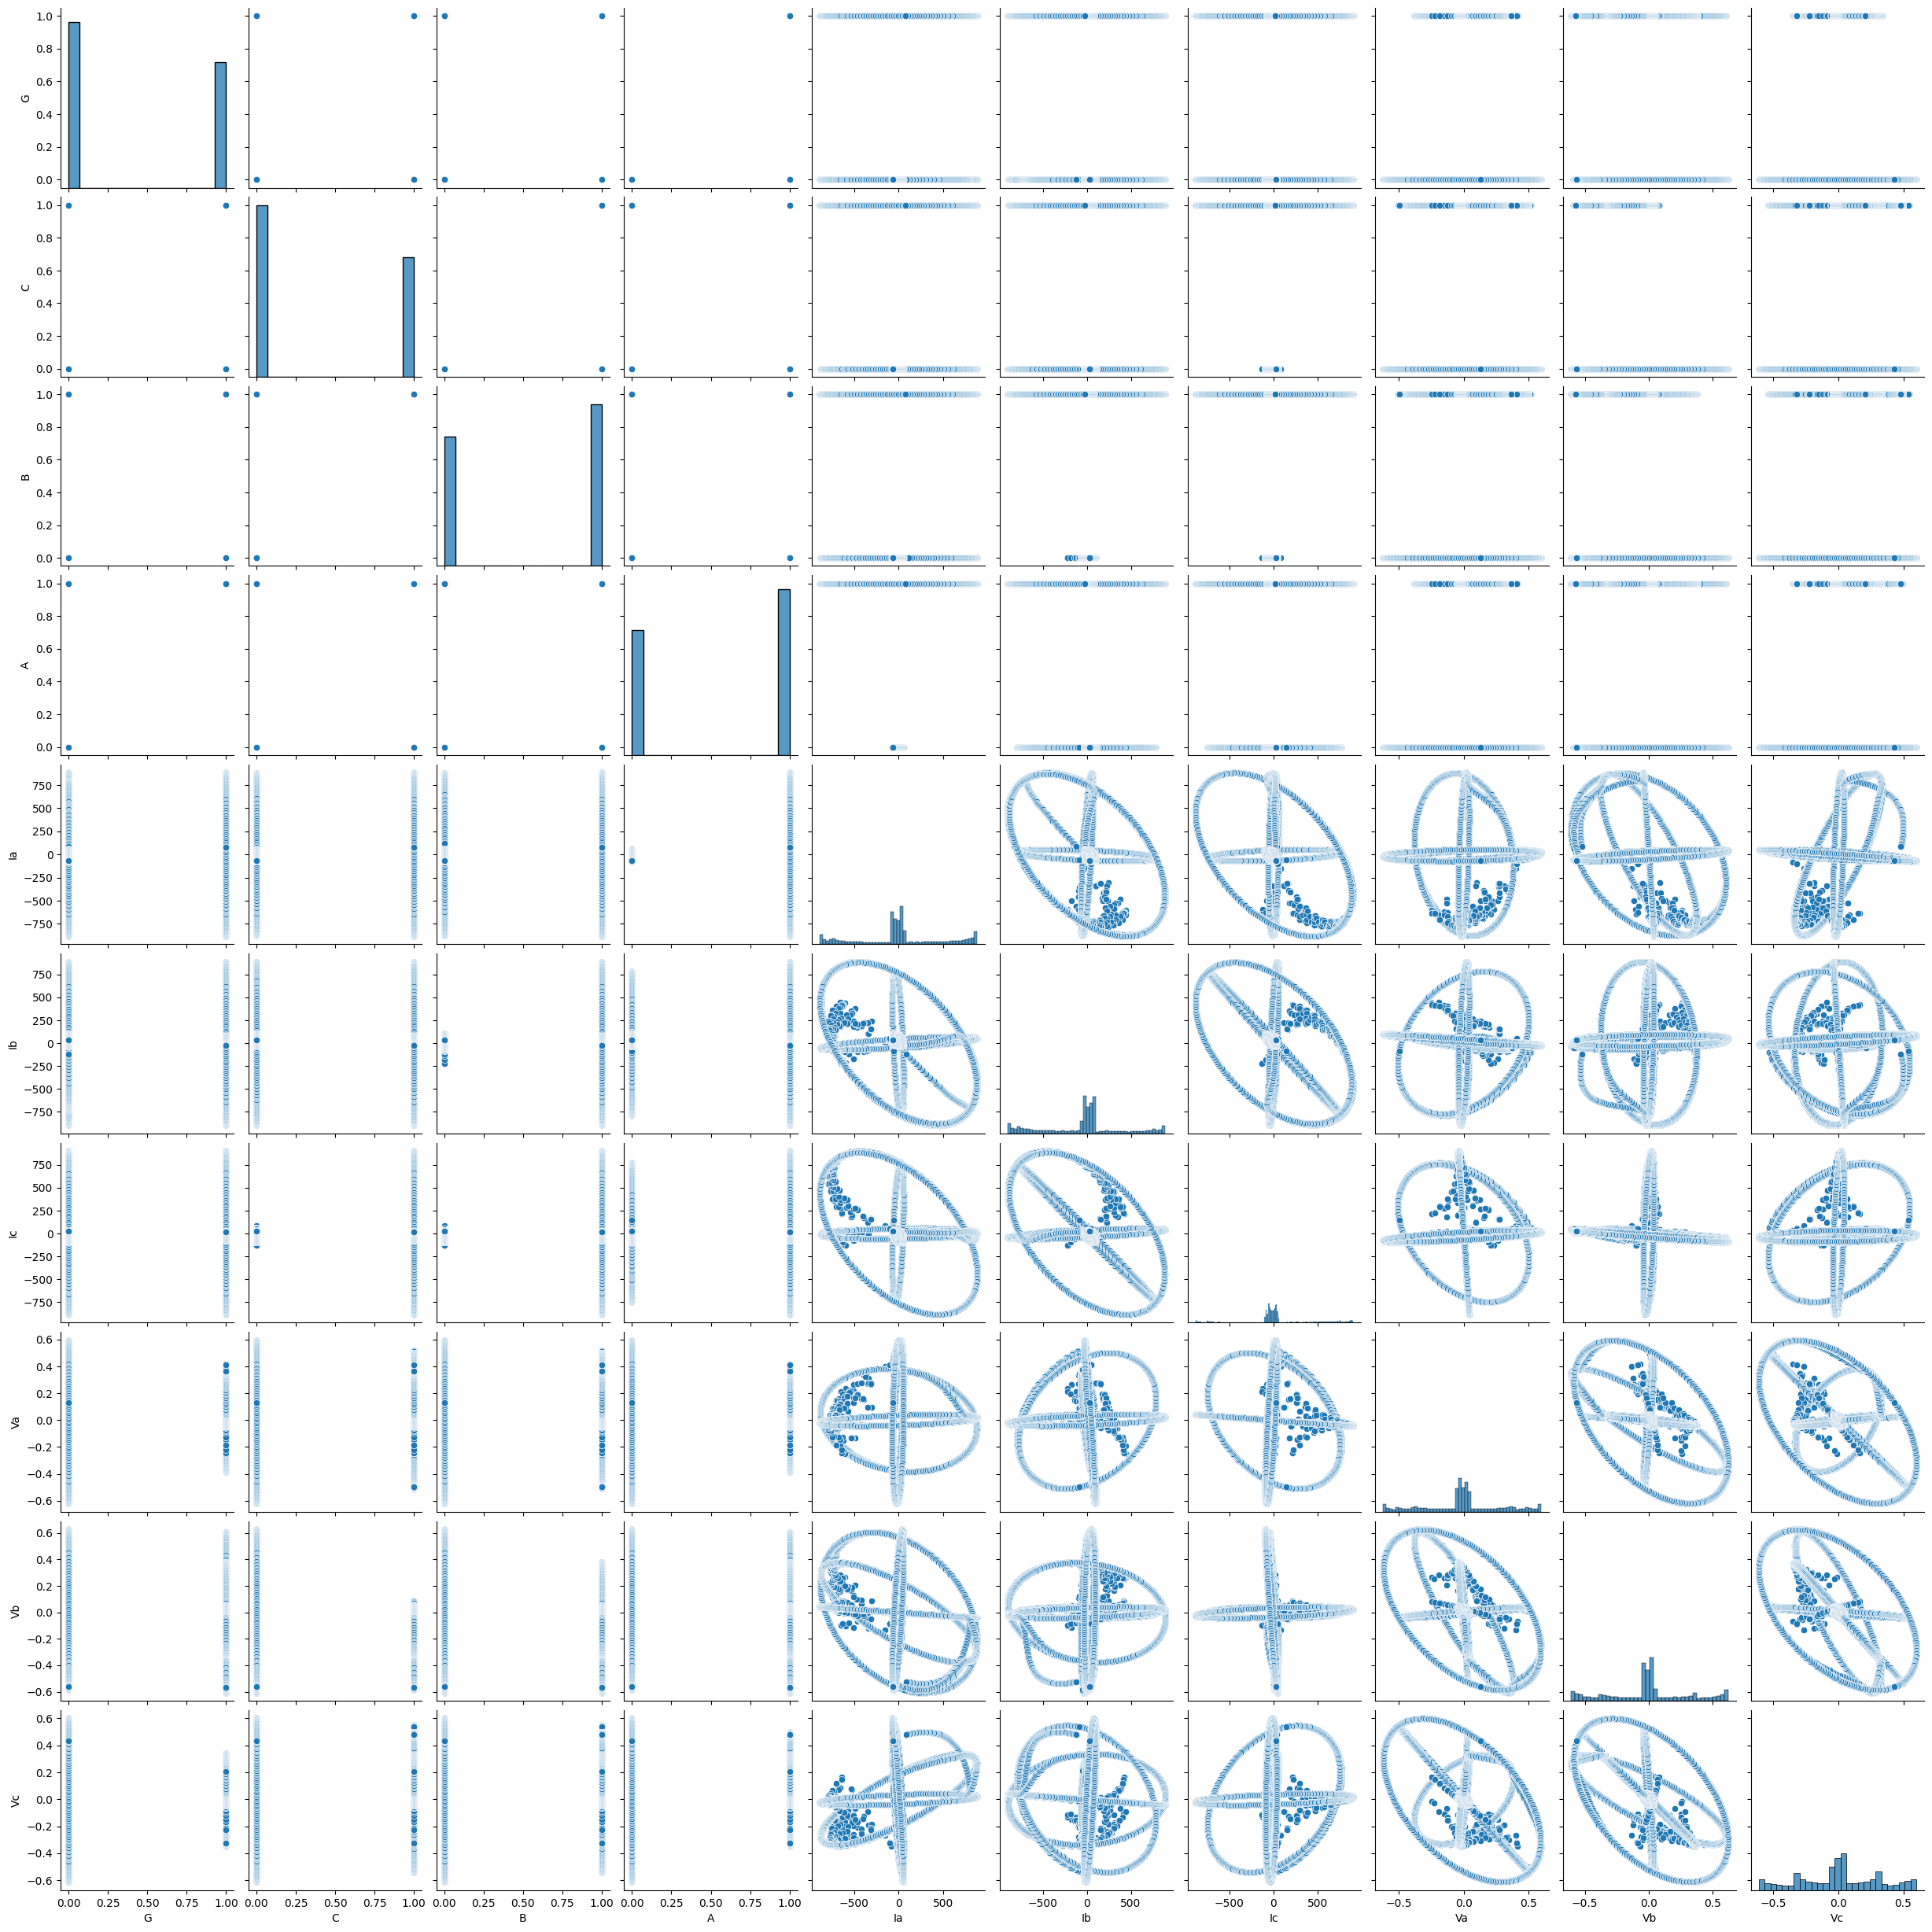

In [49]:
sns.pairplot(df_class)

# Feature Engineering